In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import calendar

In [5]:
uber = pd.read_csv('UBER.csv')

In [6]:
uber.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [7]:
#check missing values

In [8]:
uber.isnull().sum()*100/len(uber)

START_DATE*     0.000000
END_DATE*       0.086505
CATEGORY*       0.086505
START*          0.086505
STOP*           0.086505
MILES*          0.000000
PURPOSE*       43.512111
dtype: float64

In [9]:
uber.shape

(1156, 7)

In [10]:
uber[uber['END_DATE*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [11]:
uber.shape

(1156, 7)

In [12]:
uber.dropna(inplace=True)

In [13]:
uber.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [14]:
uber.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [15]:
uber1 = uber.copy()

In [16]:
uber1['START_DATE*']= pd.to_datetime(uber1['START_DATE*'], format='%m/%d/%Y  %H:%M')

In [17]:
uber1['START_DATE*']

0      2016-01-01 21:11:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
5      2016-01-06 17:15:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE*, Length: 653, dtype: datetime64[ns]

In [18]:
uber1['END_DATE*']= pd.to_datetime(uber1['END_DATE*'], format='%m/%d/%Y  %H:%M')

In [19]:
uber1.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [20]:
uber2 = uber1.copy()

In [21]:
uber2['START_YEAR'] = uber2['START_DATE*'].dt.year
uber2['START_month'] = uber2['START_DATE*'].dt.month
uber2['START_day'] = uber2['START_DATE*'].dt.day

In [22]:
uber2.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_YEAR,START_month,START_day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,1,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,1,2
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,1,5
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,1,6
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016,1,6


In [23]:
uber2['START_HOUR'] = uber2['START_DATE*'].dt.hour
uber2['START_minute'] = uber2['START_DATE*'].dt.minute

In [24]:
uber2.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_YEAR,START_month,START_day,START_HOUR,START_minute
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,1,1,21,11
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,1,2,20,25


In [25]:
weekday = []
dayofweek = []
for x in uber2['START_DATE*']:
    dayofweek.append(x.dayofweek)
    weekday.append(calendar.day_name[dayofweek[-1]])

In [26]:
uber2['DAY OF WEEK'] = dayofweek
uber2['weekday'] = weekday

In [27]:
uber2

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_YEAR,START_month,START_day,START_HOUR,START_minute,DAY OF WEEK,weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,1,1,21,11,4,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,1,2,20,25,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,1,5,17,31,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,1,6,14,42,2,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016,1,6,17,15,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,2016,12,31,1,7,5,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016,12,31,13,24,5,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016,12,31,15,3,5,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016,12,31,21,32,5,Saturday


In [28]:
uber2['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

### lets visualize this category feature

C:\Users\dasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

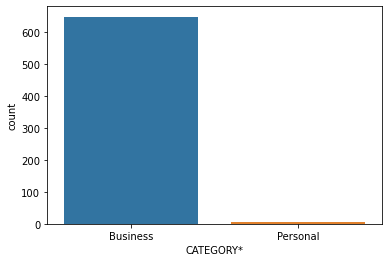

In [29]:
sns.countplot(uber2['CATEGORY*'])

In [30]:
#how long people do travel using uber

<AxesSubplot:xlabel='MILES*', ylabel='Count'>

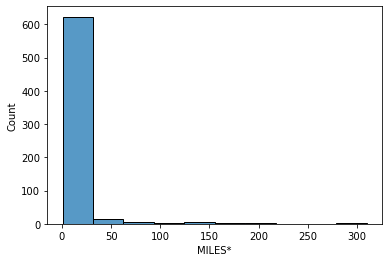

In [31]:
sns.histplot(uber2['MILES*'], bins = 10)

In [32]:
# most people used to travel less than 40 miles in uber 

<AxesSubplot:>

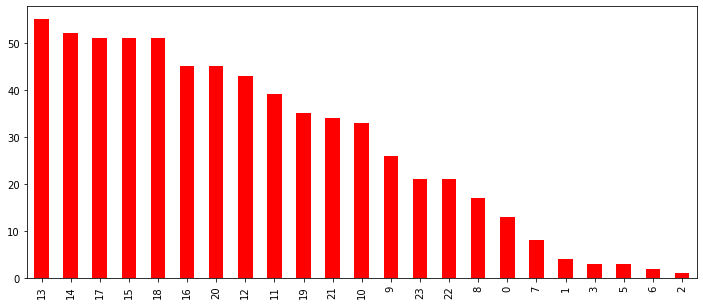

In [33]:
hour = uber2['START_HOUR'].value_counts()
hour.plot(kind = 'bar',color = 'red', figsize= (12,5))

In [35]:
#10 am to 9 pm most people take uber

In [37]:
uber2.shape

(653, 14)

# check the purpose of the trip

In [39]:
uber2['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

C:\Users\dasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


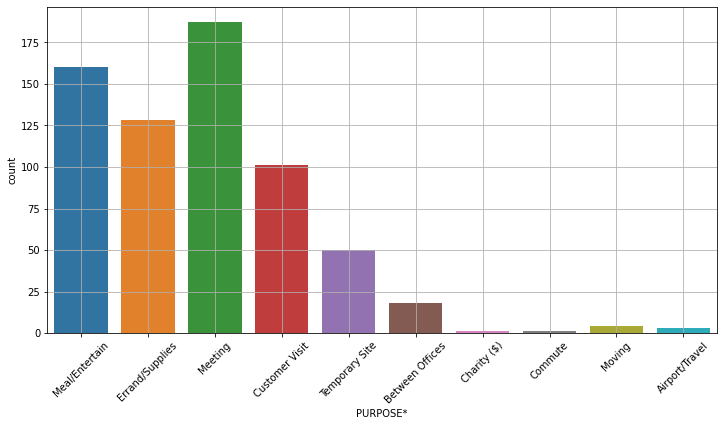

In [49]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 45)
sns.countplot(uber2['PURPOSE*'])
plt.grid(True)

<AxesSubplot:>

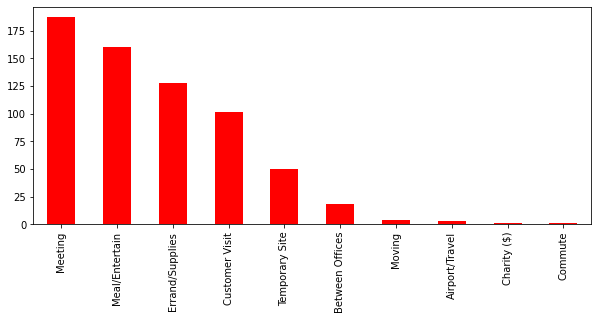

In [65]:
uber2['PURPOSE*'].value_counts().plot(kind = 'bar', figsize=(10,4), color = 'red')

# which day has the highest numbner of trip

In [50]:
uber2.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_YEAR,START_month,START_day,START_HOUR,START_minute,DAY OF WEEK,weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,1,1,21,11,4,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,1,2,20,25,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,1,5,17,31,1,Tuesday


C:\Users\dasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

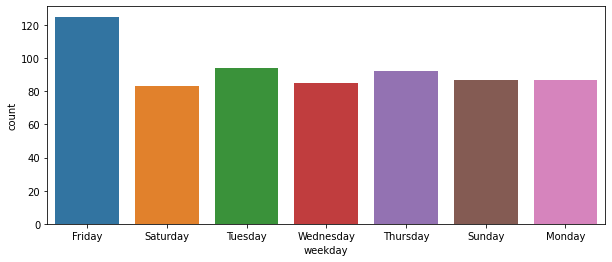

In [56]:
plt.figure(figsize=(10,4))
sns.countplot(uber2['weekday'])

# what is the number of trips per each day

In [64]:
uber2['weekday'].value_counts()

Friday       125
Tuesday       94
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: weekday, dtype: int64

<AxesSubplot:>

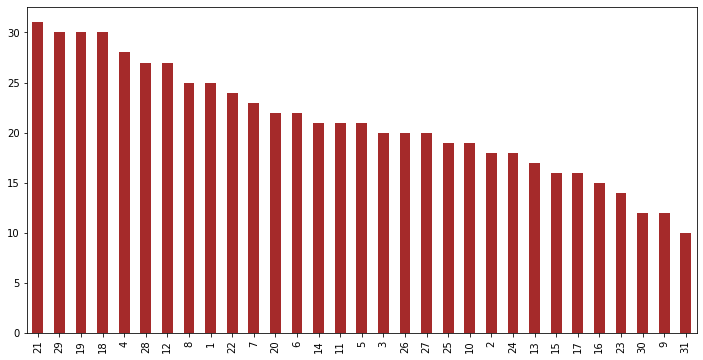

In [76]:
uber2['START_day'].value_counts().plot(kind='bar', color = 'brown', figsize=(12,6))

In [67]:
uber2.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_YEAR,START_month,START_day,START_HOUR,START_minute,DAY OF WEEK,weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,1,1,21,11,4,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,1,2,20,25,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,1,5,17,31,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,1,6,14,42,2,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016,1,6,17,15,2,Wednesday


# What are the trips in the month

<AxesSubplot:>

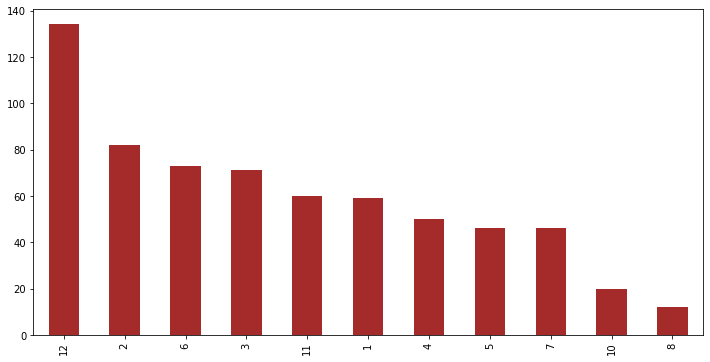

In [79]:
uber2['START_month'].value_counts().plot(kind='bar', color = 'brown', figsize=(12,6))

# where people board the cab most?

<AxesSubplot:>

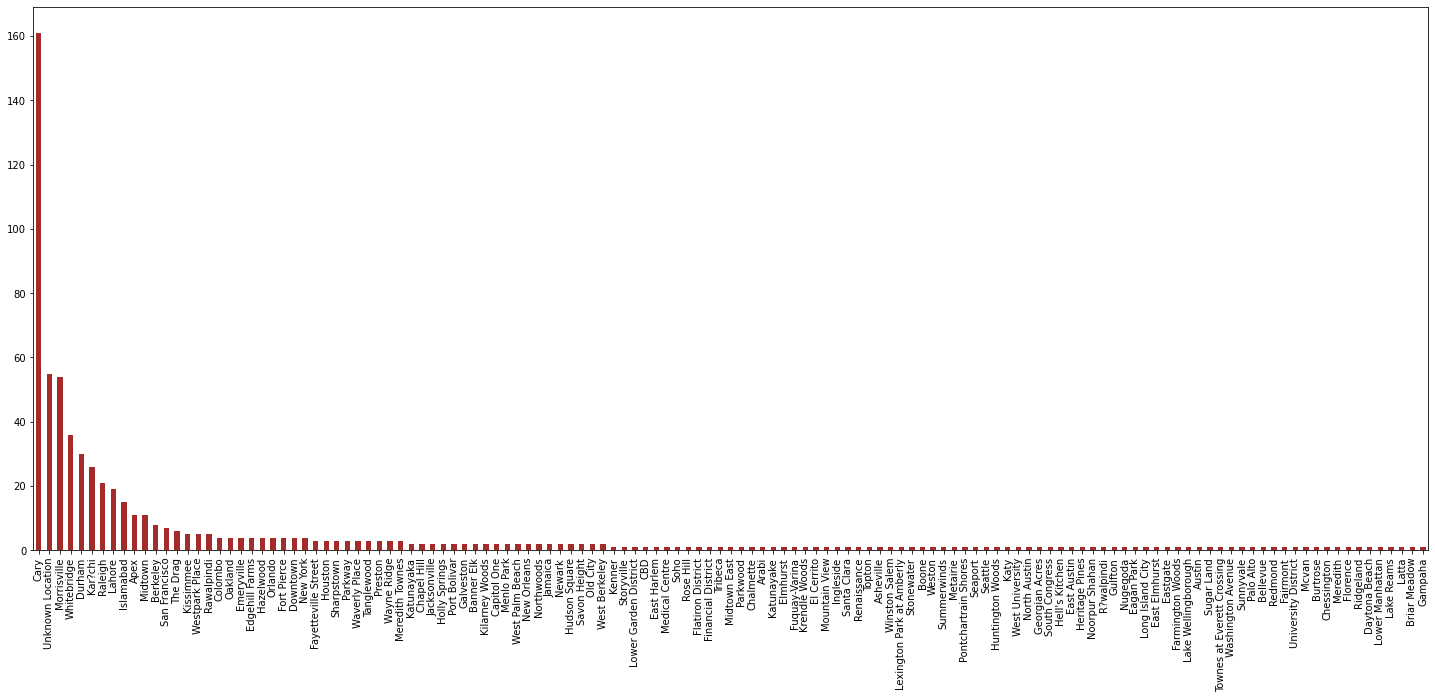

In [85]:
uber2['START*'].value_counts().plot(kind='bar', color = 'brown', figsize=(25,10))